In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from datetime import datetime

stock1 = pd.read_csv('stock/000001SZ.csv')
stock1 = stock1[['trade_date','close','vol']]
stock1.head()

,trade_date,close,vol
0,20181228,9.38,576604.00
1,20181227,9.28,624593.27
2,20181226,9.30,421140.60
3,20181225,9.34,586615.45
4,20181224,9.42,509117.67


In [2]:
stock1['trade_date'] = stock1['trade_date'].astype('str').apply(lambda x: datetime.strptime(x, "%Y%m%d"))
stock1 = stock1.set_index('trade_date')
stock1.head()

,close,vol
trade_date,,
2018-12-28,9.38,576604.00
2018-12-27,9.28,624593.27
2018-12-26,9.30,421140.60
2018-12-25,9.34,586615.45
2018-12-24,9.42,509117.67


In [3]:
stock1 = stock1.sort_index()
stock1 = stock1.fillna(method='ffill')
stock1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1925 entries, 2011-01-04 to 2018-12-28
Data columns (total 2 columns):
close    1925 non-null float64
vol      1925 non-null float64
dtypes: float64(2)
memory usage: 45.1 KB


In [4]:
stock1['past_ret_1'] = stock1.close.pct_change(1) # past day's returns
stock1['past_ret_5'] = stock1.close.pct_change(5) # past week's returns
stock1['past_ret_10'] = stock1.close.pct_change(10) # past two weeks' returns
stock1['past_ret_20'] = stock1.close.pct_change(20) # past month's (approx) returns
stock1['logVol'] = stock1.vol.apply(np.log)
stock1['past_logVol_1'] = stock1.logVol.pct_change(1) # past day's change of log volume
stock1['past_logVol_5'] = stock1.logVol.pct_change(5) # past week's change of log volume
stock1['past_logVol_10'] = stock1.logVol.pct_change(10) # past two weeks' change of log volume
stock1['past_logVol_20'] = stock1.logVol.pct_change(20) # past month's change of log volume
stock1.head()

,close,vol,past_ret_1,past_ret_5,past_ret_10,past_ret_20,logVol,past_logVol_1,past_logVol_5,past_logVol_10,past_logVol_20
trade_date,,,,,,,,,,,
2011-01-04,16.02,358840.61,NaN,NaN,NaN,NaN,12.790634,NaN,NaN,NaN,NaN
2011-01-05,15.93,237462.63,-0.005618,NaN,NaN,NaN,12.377766,-0.032279,NaN,NaN,NaN
2011-01-06,15.81,206531.27,-0.007533,NaN,NaN,NaN,12.238207,-0.011275,NaN,NaN,NaN
2011-01-07,16.41,770482.21,0.037951,NaN,NaN,NaN,13.554772,0.107578,NaN,NaN,NaN
2011-01-10,15.98,361872.13,-0.026204,NaN,NaN,NaN,12.799046,-0.055753,NaN,NaN,NaN


In [5]:
stock1['rollMean200'] = stock1['close'].rolling(window=200, min_periods=20).mean()
stock1['rollStd200'] = stock1['close'].rolling(window=200, min_periods=20).std()
stock1.head(21)

,close,vol,past_ret_1,past_ret_5,past_ret_10,past_ret_20,logVol,past_logVol_1,past_logVol_5,past_logVol_10,past_logVol_20,rollMean200,rollStd200
trade_date,,,,,,,,,,,,,
2011-01-04,16.02,358840.61,NaN,NaN,NaN,NaN,12.790634,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,15.93,237462.63,-0.005618,NaN,NaN,NaN,12.377766,-0.032279,NaN,NaN,NaN,NaN,NaN
2011-01-06,15.81,206531.27,-0.007533,NaN,NaN,NaN,12.238207,-0.011275,NaN,NaN,NaN,NaN,NaN
2011-01-07,16.41,770482.21,0.037951,NaN,NaN,NaN,13.554772,0.107578,NaN,NaN,NaN,NaN,NaN
2011-01-10,15.98,361872.13,-0.026204,NaN,NaN,NaN,12.799046,-0.055753,NaN,NaN,NaN,NaN,NaN
2011-01-11,16.19,208200.63,0.013141,0.010612,NaN,NaN,12.246257,-0.043190,-0.042561,NaN,NaN,NaN,NaN
2011-01-12,16.40,277133.44,0.012971,0.029504,NaN,NaN,12.532254,0.023354,0.012481,NaN,NaN,NaN,NaN
2011-01-13,16.34,194811.15,-0.003659,0.033523,NaN,NaN,12.179786,-0.028125,-0.004774,NaN,NaN,NaN,NaN
2011-01-14,15.99,206914.57,-0.021420,-0.025594,NaN,NaN,12.240061,0.004949,-0.096992,NaN,NaN,NaN,NaN


In [6]:
stock1['rollLogVolMean200'] = stock1['logVol'].rolling(window=200, min_periods=20).mean()
stock1['rollLogVolStd200'] = stock1['logVol'].rolling(window=200, min_periods=20).std()

In [7]:
stock1['rollStd200'] = stock1['rollStd200'].shift(1)
stock1['rollMean200'] = stock1['rollMean200'].shift(1)
stock1['rollLogVolStd200'] = stock1['rollLogVolStd200'].shift(1)
stock1['rollLogVolMean200'] = stock1['rollLogVolMean200'].shift(1)

In [8]:
stock1.head(21)

,close,vol,past_ret_1,past_ret_5,past_ret_10,past_ret_20,logVol,past_logVol_1,past_logVol_5,past_logVol_10,past_logVol_20,rollMean200,rollStd200,rollLogVolMean200,rollLogVolStd200
trade_date,,,,,,,,,,,,,,,
2011-01-04,16.02,358840.61,NaN,NaN,NaN,NaN,12.790634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,15.93,237462.63,-0.005618,NaN,NaN,NaN,12.377766,-0.032279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,15.81,206531.27,-0.007533,NaN,NaN,NaN,12.238207,-0.011275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,16.41,770482.21,0.037951,NaN,NaN,NaN,13.554772,0.107578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,15.98,361872.13,-0.026204,NaN,NaN,NaN,12.799046,-0.055753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,16.19,208200.63,0.013141,0.010612,NaN,NaN,12.246257,-0.043190,-0.042561,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-12,16.40,277133.44,0.012971,0.029504,NaN,NaN,12.532254,0.023354,0.012481,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-13,16.34,194811.15,-0.003659,0.033523,NaN,NaN,12.179786,-0.028125,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,15.99,206914.57,-0.021420,-0.025594,NaN,NaN,12.240061,0.004949,-0.096992,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
stock1['zscore_price'] = (stock1['close'] - stock1['rollMean200'] ) / stock1['rollStd200'] 
stock1['zscore_logVol'] = (stock1['logVol'] - stock1['rollLogVolMean200'] ) / stock1['rollLogVolStd200'] 
stock1.head(25)

,close,vol,past_ret_1,past_ret_5,past_ret_10,past_ret_20,logVol,past_logVol_1,past_logVol_5,past_logVol_10,past_logVol_20,rollMean200,rollStd200,rollLogVolMean200,rollLogVolStd200,zscore_price,zscore_logVol
trade_date,,,,,,,,,,,,,,,,,
2011-01-04,16.02,358840.61,NaN,NaN,NaN,NaN,12.790634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,15.93,237462.63,-0.005618,NaN,NaN,NaN,12.377766,-0.032279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,15.81,206531.27,-0.007533,NaN,NaN,NaN,12.238207,-0.011275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,16.41,770482.21,0.037951,NaN,NaN,NaN,13.554772,0.107578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,15.98,361872.13,-0.026204,NaN,NaN,NaN,12.799046,-0.055753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,16.19,208200.63,0.013141,0.010612,NaN,NaN,12.246257,-0.043190,-0.042561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-12,16.40,277133.44,0.012971,0.029504,NaN,NaN,12.532254,0.023354,0.012481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-13,16.34,194811.15,-0.003659,0.033523,NaN,NaN,12.179786,-0.028125,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,15.99,206914.57,-0.021420,-0.025594,NaN,NaN,12.240061,0.004949,-0.096992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


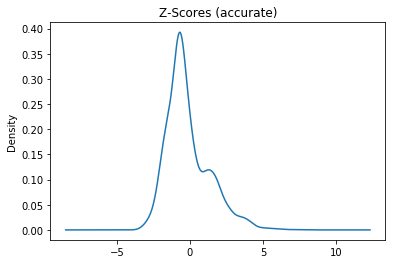

In [10]:
stock1['zscore_price'].plot.kde(title='Z-Scores (accurate)')

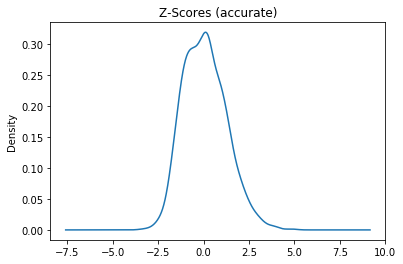

In [11]:
stock1['zscore_logVol'].plot.kde(title='Z-Scores (accurate)')

In [12]:
stock1['signLogVol_1'] = stock1['past_logVol_1'].apply(np.sign)
stock1['signRet_1'] = stock1['past_ret_1'].apply(np.sign)

In [13]:
stock1.head(21)

,close,vol,past_ret_1,past_ret_5,past_ret_10,past_ret_20,logVol,past_logVol_1,past_logVol_5,past_logVol_10,past_logVol_20,rollMean200,rollStd200,rollLogVolMean200,rollLogVolStd200,zscore_price,zscore_logVol,signLogVol_1,signRet_1
trade_date,,,,,,,,,,,,,,,,,,,
2011-01-04,16.02,358840.61,NaN,NaN,NaN,NaN,12.790634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,15.93,237462.63,-0.005618,NaN,NaN,NaN,12.377766,-0.032279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
2011-01-06,15.81,206531.27,-0.007533,NaN,NaN,NaN,12.238207,-0.011275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
2011-01-07,16.41,770482.21,0.037951,NaN,NaN,NaN,13.554772,0.107578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2011-01-10,15.98,361872.13,-0.026204,NaN,NaN,NaN,12.799046,-0.055753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
2011-01-11,16.19,208200.63,0.013141,0.010612,NaN,NaN,12.246257,-0.043190,-0.042561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0
2011-01-12,16.40,277133.44,0.012971,0.029504,NaN,NaN,12.532254,0.023354,0.012481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2011-01-13,16.34,194811.15,-0.003659,0.033523,NaN,NaN,12.179786,-0.028125,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
2011-01-14,15.99,206914.57,-0.021420,-0.025594,NaN,NaN,12.240061,0.004949,-0.096992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0


In [14]:
out_stock1 = pd.DataFrame(index = stock1.index)

### Pct Change

### Assume T+1 enter the market
out_stock1['fut_lag1_return_1'] = stock1.close.pct_change(-1).shift(-1) # next day's returns
out_stock1['fut_lag1_return_5'] = stock1.close.pct_change(-5).shift(-1) # next week's returns
out_stock1['fut_lag1_return_10'] = stock1.close.pct_change(-10).shift(-1) # next two weeks' returns
out_stock1['fut_lag1_return_20'] = stock1.close.pct_change(-20).shift(-1) # next month's (approx) returns
### Assume T+2 enter the market
out_stock1['fut_lag2_return_1'] = stock1.close.pct_change(-1).shift(-2) # next day's returns
out_stock1['fut_lag2_return_5'] = stock1.close.pct_change(-5).shift(-2) # next week's returns
out_stock1['fut_lag2_return_10'] = stock1.close.pct_change(-10).shift(-2) # next two weeks' returns
out_stock1['fut_lag2_return_20'] = stock1.close.pct_change(-20).shift(-2) # next month's (approx) returns

### Direction/sign

### Assume T+1 enter the market
out_stock1['fut_lag1_sign_1'] = np.sign(out_stock1['fut_lag1_return_1']) # next day's returns
out_stock1['fut_lag1_sign_5'] = np.sign(out_stock1['fut_lag1_return_5']) # next week's returns
out_stock1['fut_lag1_sign_10'] = np.sign(out_stock1['fut_lag1_return_10']) # next two weeks' returns
out_stock1['fut_lag1_sign_20'] = np.sign(out_stock1['fut_lag1_return_20']) # next month's (approx) returns
### Assume T+2 enter the market
out_stock1['fut_lag2_sign_1'] = np.sign(out_stock1['fut_lag2_return_1']) # next day's returns
out_stock1['fut_lag2_sign_5'] = np.sign(out_stock1['fut_lag2_return_5']) # next week's returns
out_stock1['fut_lag2_sign_10'] = np.sign(out_stock1['fut_lag2_return_10']) # next two weeks' returns
out_stock1['fut_lag2_sign_20'] = np.sign(out_stock1['fut_lag2_return_20']) # next month's (approx) returns

out_stock1.head(30)

,fut_lag1_return_1,fut_lag1_return_5,fut_lag1_return_10,fut_lag1_return_20,fut_lag2_return_1,fut_lag2_return_5,fut_lag2_return_10,fut_lag2_return_20,fut_lag1_sign_1,fut_lag1_sign_5,fut_lag1_sign_10,fut_lag1_sign_20,fut_lag2_sign_1,fut_lag2_sign_5,fut_lag2_sign_10,fut_lag2_sign_20
trade_date,,,,,,,,,,,,,,,,
2011-01-04,0.007590,-0.028659,0.028405,0.044590,-0.036563,-0.032436,0.059651,0.023301,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
2011-01-05,-0.036563,-0.032436,0.059651,0.023301,0.026909,0.026266,0.083168,0.058710,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-06,0.026909,0.026266,0.083168,0.058710,-0.012971,0.039012,0.061794,-0.001250,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
2011-01-07,-0.012971,0.039012,0.061794,-0.001250,-0.012805,0.055411,0.067238,0.023388,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
2011-01-10,-0.012805,0.055411,0.067238,0.023388,0.003672,0.058748,0.074705,0.032746,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-11,0.003672,0.058748,0.074705,0.032746,0.021889,0.095174,0.065884,0.022528,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-12,0.021889,0.095174,0.065884,0.022528,0.039662,0.055446,0.051974,0.000626,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-13,0.039662,0.055446,0.051974,0.000626,0.002608,0.021927,0.004572,-0.036944,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2011-01-14,0.002608,0.021927,0.004572,-0.036944,-0.009684,0.011206,-0.006477,-0.008403,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [15]:
from sklearn.preprocessing import StandardScaler,Normalizer


# standardize outcome 
std_scaler = StandardScaler()
outcome_scaled = std_scaler.fit_transform(out_stock1.dropna()) 
outcome_scaled = pd.DataFrame(outcome_scaled,index=out_stock1.dropna().index)
outcome_scaled.columns = out_stock1.dropna().columns


In [16]:
outcome_scaled['fut_lag2_return_5'].head()

trade_date
2011-01-04   -0.543763
2011-01-05    0.358869
2011-01-06    0.554846
2011-01-07    0.807005
2011-01-10    0.858314
Name: fut_lag2_return_5, dtype: float64

In [17]:
news = pd.read_csv('dummy_matrix.csv')
news = news.drop('Unnamed: 0', axis =1)
news['date'] =  pd.to_datetime(news['date'], format='%Y-%m-%d')
news.head()

,date,sentiment_pos,lv1_tag_国际,lv1_tag_时事,lv1_tag_社会,lv1_tag_财经,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2013-01-01,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-01,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-01,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-01,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-01,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from ast import literal_eval

stock_keywords = pd.read_csv('stock_keywords.csv')
stock_keywords['keywords'] = stock_keywords['keywords'].apply(literal_eval)
keyword1 = stock_keywords['keywords'].iloc[0]
keyword1

['平安银行',
 '存款',
 '贷款',
 '结算',
 '票据',
 '承兑',
 '贴现',
 '发行',
 '金融',
 '债券',
 '承销',
 '同业拆借',
 '拆借',
 '外汇',
 '银行',
 '银行卡',
 '信用',
 '担保',
 '保险',
 '保管箱',
 '结汇',
 '售汇',
 '离岸银行',
 '资产托管',
 '黄金',
 '财务顾问',
 '资信调查',
 '咨询',
 '见证',
 '基金',
 '股票']

In [19]:
news_keywords = pd.read_csv('news_sent_kw_tag.csv')[['date', 'keywords']]
news_keywords.head()

,date,keywords
0,2013-01-01,"['采购', '指数', '态势', '回升', '经理', '月份', '制造业', '经..."
1,2013-01-01,"['焰火', '表演', '人们', '活动', '烟火', '伦敦', '世界', '观众..."
2,2013-01-01,"['原油', '纪录', '生产', '累计', '保持', '天然气']"
3,2013-01-01,"['设计', '公众', '事情', '社会', '城市', '民生', '电视', '看看..."
4,2013-01-01,"['修改', '身份证', '证据', '实施', '诉讼', '贷款', '规定', '利..."


In [20]:
news_keywords['relevant'] = news_keywords['keywords'].apply(lambda x: any([word in x for word in keyword1]))
test = news.iloc[news_keywords[news_keywords['relevant']].index]

In [21]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
test.head()

/home/Rex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,sentiment_pos,lv1_tag_国际,lv1_tag_时事,lv1_tag_社会,lv1_tag_财经,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
4,2013-01-01,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2013-01-03,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47,2013-01-04,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,2013-01-04,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,2013-01-05,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
groupbyNews = test.groupby('date').agg({'lv1_tag_国际': 'sum',
 'lv1_tag_时事': 'sum',
 'lv1_tag_社会': 'sum',
 'lv1_tag_财经': 'sum',
 'sentiment_pos': 'mean',
 'dayofweek_1': 'mean',
 'dayofweek_2': 'mean',
 'dayofweek_3': 'mean',
 'dayofweek_4': 'mean',
 'dayofweek_5': 'mean',
 'dayofweek_6': 'mean',
 'quarter_2': 'mean',
 'quarter_3': 'mean',
 'quarter_4': 'mean',
 'month_2': 'mean',
 'month_3': 'mean',
 'month_4': 'mean',
 'month_5': 'mean',
 'month_6': 'mean',
 'month_7': 'mean',
 'month_8': 'mean',
 'month_9': 'mean',
 'month_10': 'mean',
 'month_11': 'mean',
 'month_12': 'mean',})
groupbyNews.head()

,lv1_tag_国际,lv1_tag_时事,lv1_tag_社会,lv1_tag_财经,sentiment_pos,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,1,0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,0,1,0,0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,0,0,0,2,0.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,1,0,0,0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-06,0,1,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
feature1 = groupbyNews.join(stock1, how = 'inner')

In [24]:
feature1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2013-01-04 to 2018-12-27
Data columns (total 44 columns):
lv1_tag_国际           1292 non-null int64
lv1_tag_时事           1292 non-null int64
lv1_tag_社会           1292 non-null int64
lv1_tag_财经           1292 non-null int64
sentiment_pos        1292 non-null float64
dayofweek_1          1292 non-null int64
dayofweek_2          1292 non-null int64
dayofweek_3          1292 non-null int64
dayofweek_4          1292 non-null int64
dayofweek_5          1292 non-null int64
dayofweek_6          1292 non-null int64
quarter_2            1292 non-null int64
quarter_3            1292 non-null int64
quarter_4            1292 non-null int64
month_2              1292 non-null int64
month_3              1292 non-null int64
month_4              1292 non-null int64
month_5              1292 non-null int64
month_6              1292 non-null int64
month_7              1292 non-null int64
month_8              1292 non-null int64
month_9     

In [25]:
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(feature1.dropna()) 
print (features_scaled.shape)
df = pd.DataFrame(features_scaled,index=feature1.dropna().index)
df.columns = feature1.dropna().columns
df.tail()


(1292, 44)


/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,lv1_tag_国际,lv1_tag_时事,lv1_tag_社会,lv1_tag_财经,sentiment_pos,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,...,past_logVol_10,past_logVol_20,rollMean200,rollStd200,rollLogVolMean200,rollLogVolStd200,zscore_price,zscore_logVol,signLogVol_1,signRet_1
2018-12-21,0.217366,-0.929585,-0.484734,-0.710247,0.502360,-0.498306,-0.511585,-0.507970,2.021538,0.0,...,1.847066,0.485983,-0.824358,-0.735244,0.603452,-1.091996,-0.615684,0.022004,1.057371,-1.020578
2018-12-24,-0.718756,0.257197,-0.484734,0.741714,-1.501245,-0.498306,-0.511585,-0.507970,-0.494673,0.0,...,0.005449,-0.073004,-0.830354,-0.740323,0.604645,-1.091712,-0.632542,-1.288360,-0.945742,-1.020578
2018-12-25,-0.718756,-0.929585,-0.484734,0.741714,-3.504850,2.006798,-0.511585,-0.507970,-0.494673,0.0,...,1.149255,-0.385489,-0.836212,-0.744739,0.602030,-1.080621,-0.686124,-1.008364,1.057371,-1.020578
2018-12-26,-0.718756,-0.929585,-0.484734,0.741714,0.502360,-0.498306,1.954711,-0.507970,-0.494673,0.0,...,0.199611,-0.425648,-0.842046,-0.748276,0.599544,-1.073243,-0.709825,-1.642550,-0.945742,-1.020578
2018-12-27,-0.718756,-0.929585,-0.484734,-0.710247,0.502360,-0.498306,-0.511585,1.968622,-0.494673,0.0,...,-0.430842,0.339572,-0.848529,-0.753778,0.589605,-1.048320,-0.719804,-0.868040,1.057371,-1.020578


In [26]:
index = df.index.intersection(outcome_scaled['fut_lag2_return_5'].index)

In [27]:
fut_lag2_return_5 = outcome_scaled['fut_lag2_return_5'].loc[index]
df = df.loc[index]

In [28]:
corr25 = df.corrwith(fut_lag2_return_5 )
corr25[abs(corr25) > 0.1]

quarter_2           0.176587
month_6             0.266017
close               0.168320
rollMean200         0.135028
rollStd200          0.106278
rollLogVolStd200    0.123705
dtype: float64

In [29]:
fut_lag2_return_1 = outcome_scaled['fut_lag2_return_1'].loc[index]
corr21 = df.corrwith(fut_lag2_return_1)
corr21[abs(corr21) > 0.1]

month_6    0.140474
dtype: float64

In [30]:
fut_lag2_return_10 = outcome_scaled['fut_lag2_return_10'].loc[index]
corr210 = df.corrwith(fut_lag2_return_10)
corr210[abs(corr210) > 0.1]

quarter_2           0.217124
month_6             0.282924
month_10           -0.109757
close               0.256003
rollMean200         0.181229
rollStd200          0.136685
rollLogVolStd200    0.164280
dtype: float64

In [31]:
fut_lag2_return_20 = outcome_scaled['fut_lag2_return_20'].loc[index]
corr220 = df.corrwith(fut_lag2_return_20)
corr220[abs(corr220) > 0.1]

quarter_2           0.278854
quarter_3          -0.128004
quarter_4          -0.104990
month_5             0.275629
month_6             0.156725
month_10           -0.138732
close               0.377488
rollMean200         0.256111
rollStd200          0.190759
rollLogVolStd200    0.234795
dtype: float64

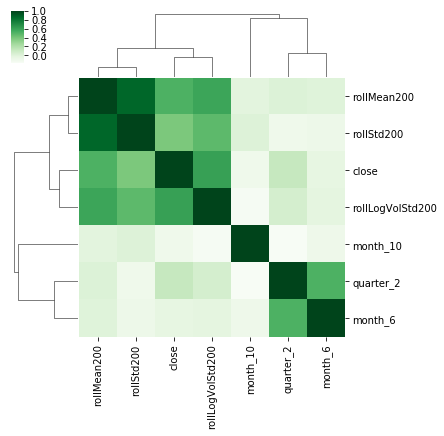

Correlation Strength:
month_6             0.282924
close               0.256003
quarter_2           0.217124
rollMean200         0.181229
rollLogVolStd200    0.164280
rollStd200          0.136685
month_10           -0.109757
dtype: float64


In [32]:
from scipy.cluster import hierarchy
from scipy.spatial import distance

correlated_features = corr210[abs(corr210)>0.1].index.tolist()
corr_matrix = df[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr210[abs(corr210)>0.1].sort_values(ascending=False))

In [33]:
corr210[abs(corr210)>0.1].sort_values(ascending=False).index.tolist()

['month_6',
 'close',
 'quarter_2',
 'rollMean200',
 'rollLogVolStd200',
 'rollStd200',
 'month_10']

/home/Rex/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


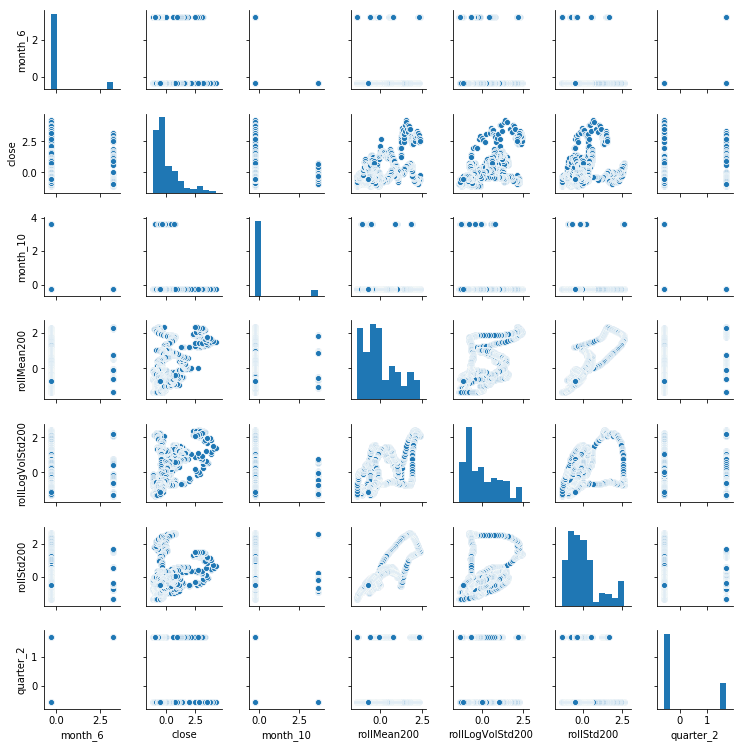

In [34]:
# selected_features = ['month_6','close', 'month_10','rollMean200','rollLogVolStd200']
# selected_features = ['month_6','close', 'month_10']
selected_features = ['month_6','close', 'month_10','rollMean200','rollLogVolStd200','rollStd200','quarter_2']
sns.pairplot(df[selected_features],size=1.5)

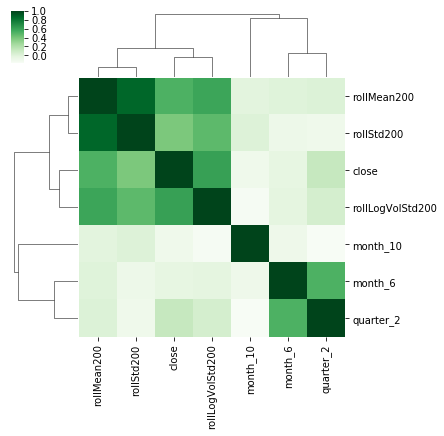

In [35]:
corr_matrix = df[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

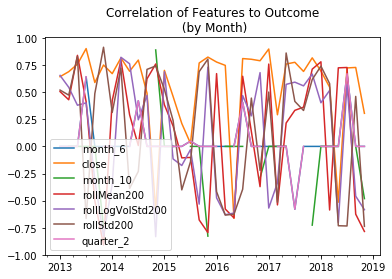

In [36]:
tmp = df[selected_features].join(fut_lag2_return_20 )
tmp.dropna().resample('2M').apply(lambda x: x.corr()).iloc[:,-1].unstack().iloc[:,:-1].plot(title='Correlation of Features to Outcome\n (by Month)')
# shows time stability

In [37]:
tmp.resample('Q').mean().index.values[:-1]

array(['2013-03-31T00:00:00.000000000', '2013-06-30T00:00:00.000000000',
       '2013-09-30T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-03-31T00:00:00.000000000', '2014-06-30T00:00:00.000000000',
       '2014-09-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-03-31T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-06-30T00:00:00.000000000',
       '2017-09-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [38]:
from sklearn.base import clone
from sklearn.linear_model import LinearRegression


def make_walkforward_model(features,outcome,algo=LinearRegression()):
    recalc_dates = features.resample('Q').mean().index.values[:-1]
    
    ## Train models
    models = pd.Series(index=recalc_dates)
    for date in recalc_dates:    
        X_train = features.loc[slice(None,date)]
        y_train = outcome.loc[slice(None,date)]
        print(f'Train with data prior to: {date} ({y_train.count()} obs)')
        
        model = clone(algo)
        model.fit(X_train,y_train)
        models.loc[date] = model

    begin_dates = models.index
    end_dates = models.index[1:].append(pd.to_datetime(['2099-12-31']))

    ## Generate OUT OF SAMPLE walk-forward predictions
    predictions = pd.Series(index=features.index)
    for i,model in enumerate(models): #loop thru each models object in collection
        print(f'Using model trained on {begin_dates[i]}, Predict from: {begin_dates[i]} to: {end_dates[i]}')
        X = features.loc[slice(begin_dates[i],end_dates[i])]
        p = pd.Series(model.predict(X),index=X.index)
        predictions.loc[X.index] = p
    
    return models,predictions

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

X = df[selected_features]
y = fut_lag2_return_10

linear_models,linear_preds = make_walkforward_model(X,y,algo=LinearRegression())
tree_models,tree_preds = make_walkforward_model(X,y,algo=ExtraTreesRegressor())

Train with data prior to: 2013-03-31T00:00:00.000000000 (43 obs)
Train with data prior to: 2013-06-30T00:00:00.000000000 (91 obs)
Train with data prior to: 2013-09-30T00:00:00.000000000 (141 obs)
Train with data prior to: 2013-12-31T00:00:00.000000000 (197 obs)
Train with data prior to: 2014-03-31T00:00:00.000000000 (246 obs)
Train with data prior to: 2014-06-30T00:00:00.000000000 (306 obs)
Train with data prior to: 2014-09-30T00:00:00.000000000 (369 obs)
Train with data prior to: 2014-12-31T00:00:00.000000000 (429 obs)
Train with data prior to: 2015-03-31T00:00:00.000000000 (483 obs)
Train with data prior to: 2015-06-30T00:00:00.000000000 (544 obs)
Train with data prior to: 2015-09-30T00:00:00.000000000 (603 obs)
Train with data prior to: 2015-12-31T00:00:00.000000000 (660 obs)
Train with data prior to: 2016-03-31T00:00:00.000000000 (711 obs)
Train with data prior to: 2016-06-30T00:00:00.000000000 (763 obs)
Train with data prior to: 2016-09-30T00:00:00.000000000 (820 obs)
Train with d

/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/

Train with data prior to: 2017-06-30T00:00:00.000000000 (973 obs)
Train with data prior to: 2017-09-30T00:00:00.000000000 (1031 obs)
Train with data prior to: 2017-12-31T00:00:00.000000000 (1081 obs)
Train with data prior to: 2018-03-31T00:00:00.000000000 (1128 obs)
Train with data prior to: 2018-06-30T00:00:00.000000000 (1183 obs)
Train with data prior to: 2018-09-30T00:00:00.000000000 (1238 obs)
Using model trained on 2013-03-31 00:00:00, Predict from: 2013-03-31 00:00:00 to: 2013-06-30 00:00:00
Using model trained on 2013-06-30 00:00:00, Predict from: 2013-06-30 00:00:00 to: 2013-09-30 00:00:00
Using model trained on 2013-09-30 00:00:00, Predict from: 2013-09-30 00:00:00 to: 2013-12-31 00:00:00
Using model trained on 2013-12-31 00:00:00, Predict from: 2013-12-31 00:00:00 to: 2014-03-31 00:00:00
Using model trained on 2014-03-31 00:00:00, Predict from: 2014-03-31 00:00:00 to: 2014-06-30 00:00:00
Using model trained on 2014-06-30 00:00:00, Predict from: 2014-06-30 00:00:00 to: 2014-09

/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
print("Models:")
print(linear_models.head())
print()
print("Predictions:")
print(linear_preds.dropna().head())

Models:
2013-03-31    LinearRegression(copy_X=True, fit_intercept=Tr...
2013-06-30    LinearRegression(copy_X=True, fit_intercept=Tr...
2013-09-30    LinearRegression(copy_X=True, fit_intercept=Tr...
2013-12-31    LinearRegression(copy_X=True, fit_intercept=Tr...
2014-03-31    LinearRegression(copy_X=True, fit_intercept=Tr...
dtype: object

Predictions:
2013-04-01    1.683772
2013-04-02    1.790518
2013-04-03    1.921059
2013-04-08    1.962912
2013-04-09    2.080130
dtype: float64


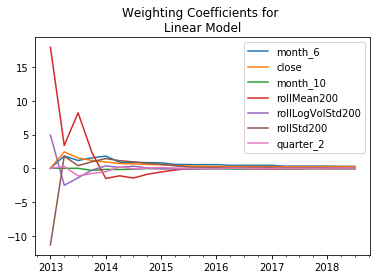

In [41]:
pd.DataFrame([model.coef_ for model in linear_models],
             columns=X.columns,index=linear_models.index).plot(title='Weighting Coefficients for \nLinear Model')

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error

def calc_scorecard(y_pred,y_true):
    
    def make_df(y_pred,y_true):
        y_pred.name = 'y_pred'
        y_true.name = 'y_true'

        df = pd.concat([y_pred,y_true],axis=1).dropna()

        df['sign_pred'] = df.y_pred.apply(np.sign)
        df['sign_true'] = df.y_true.apply(np.sign)
        df['is_correct'] = 0
        df.loc[df.sign_pred * df.sign_true > 0 ,'is_correct'] = 1 # only registers 1 when prediction was made AND it was correct
        df['is_incorrect'] = 0
        df.loc[df.sign_pred * df.sign_true < 0,'is_incorrect'] = 1 # only registers 1 when prediction was made AND it was wrong
        df['is_predicted'] = df.is_correct + df.is_incorrect
        df['result'] = df.sign_pred * df.y_true 
        return df
    
    df = make_df(y_pred,y_true)
    
    scorecard = pd.Series()
    # building block metrics
    scorecard.loc['RSQ'] = r2_score(df.y_true,df.y_pred)
    scorecard.loc['MAE'] = mean_absolute_error(df.y_true,df.y_pred)
    scorecard.loc['directional_accuracy'] = df.is_correct.sum()*1. / (df.is_predicted.sum()*1.)*100
    scorecard.loc['edge'] = df.result.mean()
    scorecard.loc['noise'] = df.y_pred.diff().abs().mean()
    # derived metrics
    scorecard.loc['edge_to_noise'] = scorecard.loc['edge'] / scorecard.loc['noise']
    scorecard.loc['edge_to_mae'] = scorecard.loc['edge'] / scorecard.loc['MAE']
    return scorecard    

calc_scorecard(y_pred=linear_preds,y_true=y).rename('Linear')

RSQ                     -2.538322
MAE                      1.338347
directional_accuracy    55.410903
edge                     0.158403
noise                    0.096134
edge_to_noise            1.647744
edge_to_mae              0.118358
Name: Linear, dtype: float64

                      2016-12-31  2017-12-31  2018-12-31
RSQ                    -0.986289   -0.934136    0.148870
MAE                     0.595813    0.560866    0.508093
directional_accuracy   61.320755   59.808612   51.832461
edge                    0.073921    0.145795    0.153994
noise                   0.032315    0.029351    0.031115
edge_to_noise           2.287514    4.967246    4.949215
edge_to_mae             0.124068    0.259947    0.303082


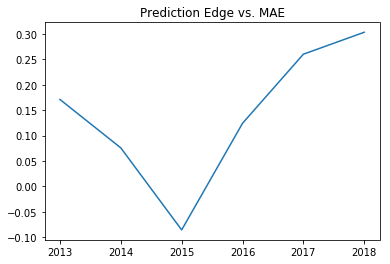

In [43]:
def scores_over_time(y_pred,y_true):
    df = pd.concat([y_pred,y_true],axis=1).dropna()
    scores = df.resample('A').apply(lambda df: calc_scorecard(df[y_pred.name],df[y_true.name]))
    return scores

scores_by_year = scores_over_time(y_pred=linear_preds,y_true=y)
print(scores_by_year.tail(3).T)
scores_by_year['edge_to_mae'].plot(title='Prediction Edge vs. MAE')

In [44]:
from sklearn.linear_model import LassoCV
def prepare_Xy(X_raw,y_raw):
    ''' Utility function to drop any samples without both valid X and y values'''
    Xy = X_raw.join(y_raw).replace({np.inf:None,-np.inf:None}).dropna()
    X = Xy.iloc[:,:-1]
    y = Xy.iloc[:,-1]
    return X,y
X_ens, y_ens = prepare_Xy(X_raw=pd.concat([linear_preds.rename('linear'),tree_preds.rename('tree')],
                                          axis=1),y_raw=y)

ensemble_models,ensemble_preds = make_walkforward_model(X_ens,y_ens,algo=LassoCV(positive=True))
ensemble_preds = ensemble_preds.rename('ensemble')
print(ensemble_preds.dropna().head())

Train with data prior to: 2013-06-30T00:00:00.000000000 (48 obs)
Train with data prior to: 2013-09-30T00:00:00.000000000 (98 obs)
Train with data prior to: 2013-12-31T00:00:00.000000000 (154 obs)
Train with data prior to: 2014-03-31T00:00:00.000000000 (203 obs)
Train with data prior to: 2014-06-30T00:00:00.000000000 (263 obs)
Train with data prior to: 2014-09-30T00:00:00.000000000 (326 obs)
Train with data prior to: 2014-12-31T00:00:00.000000000 (386 obs)
Train with data prior to: 2015-03-31T00:00:00.000000000 (440 obs)
Train with data prior to: 2015-06-30T00:00:00.000000000 (501 obs)
Train with data prior to: 2015-09-30T00:00:00.000000000 (560 obs)
Train with data prior to: 2015-12-31T00:00:00.000000000 (617 obs)


/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of rely

Train with data prior to: 2016-03-31T00:00:00.000000000 (668 obs)
Train with data prior to: 2016-06-30T00:00:00.000000000 (720 obs)
Train with data prior to: 2016-09-30T00:00:00.000000000 (777 obs)
Train with data prior to: 2016-12-31T00:00:00.000000000 (829 obs)
Train with data prior to: 2017-03-31T00:00:00.000000000 (878 obs)
Train with data prior to: 2017-06-30T00:00:00.000000000 (930 obs)
Train with data prior to: 2017-09-30T00:00:00.000000000 (988 obs)
Train with data prior to: 2017-12-31T00:00:00.000000000 (1038 obs)
Train with data prior to: 2018-03-31T00:00:00.000000000 (1085 obs)
Train with data prior to: 2018-06-30T00:00:00.000000000 (1140 obs)
Train with data prior to: 2018-09-30T00:00:00.000000000 (1195 obs)


/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/Rex/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of rely

Using model trained on 2013-06-30 00:00:00, Predict from: 2013-06-30 00:00:00 to: 2013-09-30 00:00:00
Using model trained on 2013-09-30 00:00:00, Predict from: 2013-09-30 00:00:00 to: 2013-12-31 00:00:00
Using model trained on 2013-12-31 00:00:00, Predict from: 2013-12-31 00:00:00 to: 2014-03-31 00:00:00
Using model trained on 2014-03-31 00:00:00, Predict from: 2014-03-31 00:00:00 to: 2014-06-30 00:00:00
Using model trained on 2014-06-30 00:00:00, Predict from: 2014-06-30 00:00:00 to: 2014-09-30 00:00:00
Using model trained on 2014-09-30 00:00:00, Predict from: 2014-09-30 00:00:00 to: 2014-12-31 00:00:00
Using model trained on 2014-12-31 00:00:00, Predict from: 2014-12-31 00:00:00 to: 2015-03-31 00:00:00
Using model trained on 2015-03-31 00:00:00, Predict from: 2015-03-31 00:00:00 to: 2015-06-30 00:00:00
Using model trained on 2015-06-30 00:00:00, Predict from: 2015-06-30 00:00:00 to: 2015-09-30 00:00:00
Using model trained on 2015-09-30 00:00:00, Predict from: 2015-09-30 00:00:00 to: 

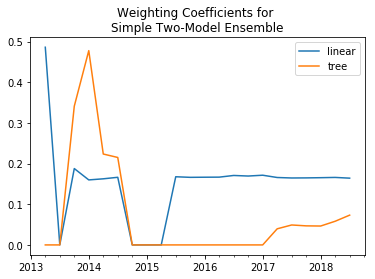

In [45]:
pd.DataFrame([model.coef_ for model in ensemble_models],
             columns=X_ens.columns,index=ensemble_models.index).plot(title='Weighting Coefficients for \nSimple Two-Model Ensemble')

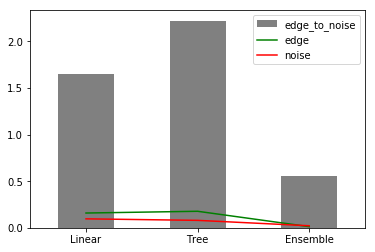

                         Linear       Tree   Ensemble
RSQ                   -2.538322  -0.158164  -1.064132
MAE                    1.338347   0.721021   0.626872
directional_accuracy  55.410903  57.526444  51.143099
edge                   0.158403   0.177163   0.012177
noise                  0.096134   0.079788   0.021841
edge_to_noise          1.647744   2.220438   0.557530
edge_to_mae            0.118358   0.245712   0.019425


In [46]:
# calculate scores for each model
score_ens = calc_scorecard(y_pred=ensemble_preds,y_true=y_ens).rename('Ensemble')
score_linear = calc_scorecard(y_pred=linear_preds,y_true=y_ens).rename('Linear')
score_tree = calc_scorecard(y_pred=tree_preds,y_true=y_ens).rename('Tree')


scores = pd.concat([score_linear,score_tree,score_ens],axis=1)
scores.loc['edge_to_noise'].plot.bar(color='grey',legend=True)
scores.loc['edge'].plot(color='green',legend=True)
scores.loc['noise'].plot(color='red',legend=True)

plt.show()
print(scores)

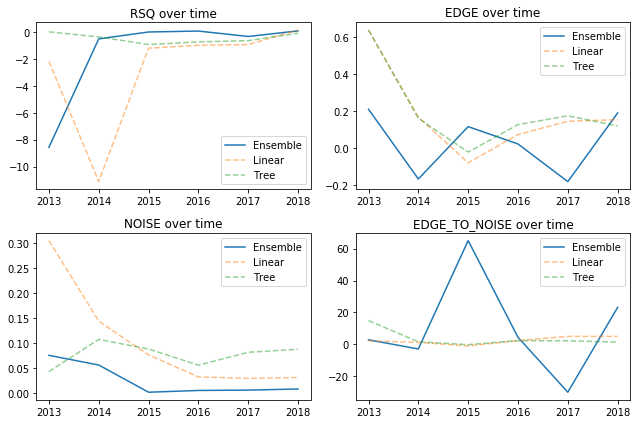

In [47]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(9,6))
metric = 'RSQ'
scores_over_time(y_pred=ensemble_preds.rename('ensemble'),y_true=y)[metric].rename('Ensemble').\
plot(title=f'{metric.upper()} over time',legend=True,ax=ax1)
scores_over_time(y_pred=linear_preds.rename('linear'),y_true=y)[metric].rename('Linear').\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax1)
scores_over_time(y_pred=tree_preds.rename('tree'),y_true=y)[metric].rename("Tree").\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax1)

metric = 'edge'
scores_over_time(y_pred=ensemble_preds.rename('ensemble'),y_true=y)[metric].rename('Ensemble').\
plot(title=f'{metric.upper()} over time',legend=True,ax=ax2)
scores_over_time(y_pred=linear_preds.rename('linear'),y_true=y)[metric].rename('Linear').\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax2)
scores_over_time(y_pred=tree_preds.rename('tree'),y_true=y)[metric].rename("Tree").\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax2)

metric = 'noise'
scores_over_time(y_pred=ensemble_preds.rename('ensemble'),y_true=y)[metric].rename('Ensemble').\
plot(title=f'{metric.upper()} over time',legend=True,ax=ax3)
scores_over_time(y_pred=linear_preds.rename('linear'),y_true=y)[metric].rename('Linear').\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax3)
scores_over_time(y_pred=tree_preds.rename('tree'),y_true=y)[metric].rename("Tree").\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax3)

metric = 'edge_to_noise'
scores_over_time(y_pred=ensemble_preds.rename('ensemble'),y_true=y)[metric].rename('Ensemble').\
plot(title=f'{metric.upper()} over time',legend=True,ax=ax4)
scores_over_time(y_pred=linear_preds.rename('linear'),y_true=y)[metric].rename('Linear').\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax4)
scores_over_time(y_pred=tree_preds.rename('tree'),y_true=y)[metric].rename("Tree").\
plot(title=f'{metric.upper()} over time',legend=True, alpha = 0.5, linestyle='--',ax=ax4)

plt.tight_layout()
plt.show()